In [3]:
import pubchempy as pcp
from pprint import pprint
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import numpy as np
import selfies as sf
import matplotlib.pyplot as plt
import re
print('done')

done


PLAN: (3) then add everything to "main excel spreadsheet", (4) get data on longest carbon chains, (5) types of O and N bonding, and then (more general aspect of 4 and 5: understand how to get sub structures. As this is the "obvious way" to use ARM on compounds--can you associate substructures with properties of the compound)   (6) figure out how to get something that fulfills module 2 requirements (including putting everything on github!!!), and (7) then figure out how to do what I actually want to do (will likely require NLP at this stage, to see whether can use ARM to associate substructures, to things in the "written portions" of pubchem)

At some point, make some of the visualizations a bit nicer.

percentage of compounds with a given element

In [36]:
#df = pd.read_csv('C:\\Users\jonat_od7omk3\Desktop\CSCI_5622\pub_chem_1000_compounds.csv')
df = pd.read_csv('.\pub_chem_1000_compounds.csv')
d = df.to_dict(orient='list')

In [30]:
d = df.to_dict(orient='list')
print(d.keys())
print('\n\n')

num_times_element_appears = {'C':0, 'H':0, 'O':0, 'N':0, 'P':0, 'Cl':0, 'S':0,
                             'Se':0, 'As':0, 'Br':0, 'Ca':0, 'Co':0, 'Fe':0, 
                             'Hg':0, 'I':0, 'K':0, 'Mg':0, 'Na':0, 'Ni':0}

n_atoms_in_compound = []

for i in d['CID']:
#for i in range(1,10):
    n_atoms_in_compound.append(0)
    
    for j in num_times_element_appears.keys():
        
        #get number of compounds with each element (and then will convert to a percentage, afterwards)
        if int(d[j][i-1])  != 0:
            num_times_element_appears[j] += 1
            
            n_atoms_in_compound[i-1] += d[j][i-1]
            
print(num_times_element_appears)
#print('\n\n')
#print(n_atoms_in_compound)


dict_keys(['Unnamed: 0', 'CID', 'smiles_repr', 'selfies_repr', 'h_acc', 'h_don', 'C', 'H', 'O', 'N', 'P', 'Cl', 'S', 'Se', 'As', 'Br', 'Ca', 'Co', 'Fe', 'Hg', 'I', 'K', 'Mg', 'Na', 'Ni'])



{'C': 957, 'H': 980, 'O': 940, 'N': 572, 'P': 279, 'Cl': 28, 'S': 116, 'Se': 3, 'As': 4, 'Br': 2, 'Ca': 2, 'Co': 2, 'Fe': 3, 'Hg': 2, 'I': 3, 'K': 2, 'Mg': 2, 'Na': 2, 'Ni': 2}


<BarContainer object of 19 artists>

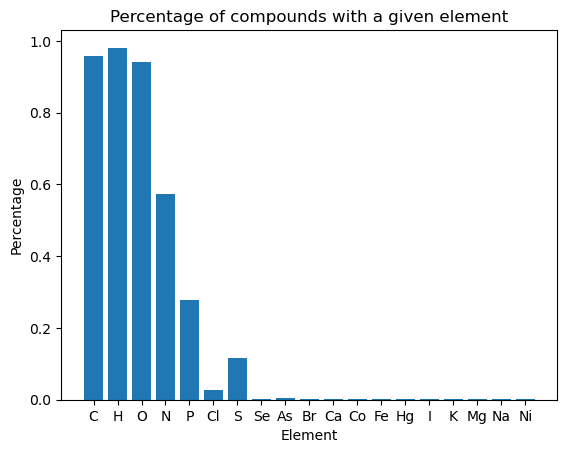

In [68]:
compounds = list(num_times_element_appears.keys())
perc_occurance = np.array(list(num_times_element_appears.values()))/len(d['CID'])

plt.title('Percentage of compounds with a given element')
plt.xlabel('Element')
plt.ylabel('Percentage')
plt.bar(compounds, perc_occurance)

number of compounds with N hydrogen donors

(0.0, 500.0)

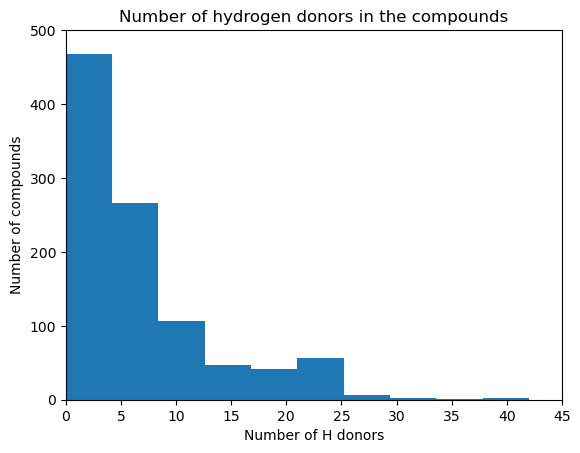

In [84]:
plt.hist(d['h_don'])

plt.title('Number of hydrogen donors in the compounds')
plt.xlabel('Number of H donors')
plt.ylabel('Number of compounds')
plt.xlim(0,45)
plt.ylim(0,500)

number of compounds with N hydrogen acceptors

(0.0, 500.0)

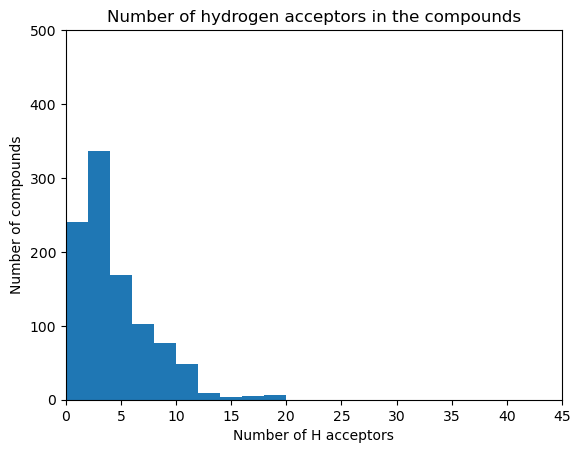

In [85]:
plt.hist(d['h_acc'])

plt.title('Number of hydrogen acceptors in the compounds')
plt.xlabel('Number of H acceptors')
plt.ylabel('Number of compounds')
plt.xlim(0,45)
plt.ylim(0,500)

#the below graph cannot be correct,

sizes of the molecules in the dataset

Text(0, 0.5, 'Number of atoms')

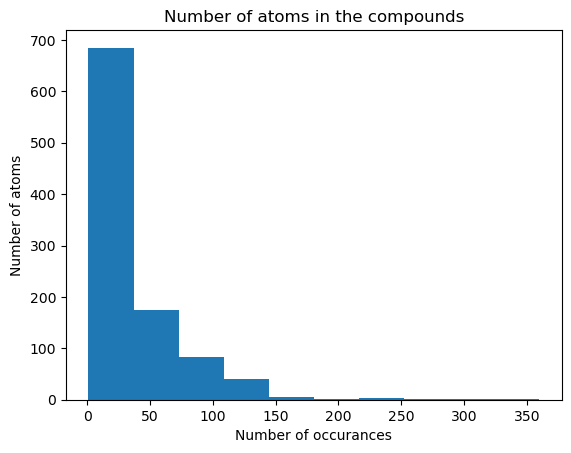

In [83]:
plt.hist(n_atoms_in_compound)

plt.title('Number of atoms in the compounds')
plt.xlabel('Number of atoms')
plt.ylabel('Number of compounds')

understanding the role of the "third and fourth" most common elements (N and O) in the compounds, by looking at their occurrence versus occurances of H donors/acceptors

the types of bonding that the oxygens have (e.g. only double bonds, double and single bonds, only single bonds)

lengths of carbon chains that appear (use RDKit substructure searching!)

number of O-C single bonds, of O=C double bonds, of C-N single bonds, of C=N double bonds, of C#N triple bonds. At some point, encorporate sulfur and phosphorus especially, and if it "doesn't have one of the big 6"

Determining the number of rings in each compound and the number of branches

In [46]:
#testing to make sure that it works

smiles_repr = d['smiles_repr'][5]
#print(smiles_repr)

num_b = 0
num_r = 0

for j in smiles_repr:
    #print(j)
    if j == '(': num_b += 1

    try:
        r = int(j)
        if r > num_r: num_r = r

    except:            
        pass
#print('\n')
#print(num_b)
#print(num_r)
    

In [60]:
d['n_rings'] = []
d['n_branches'] = []


for i in d['CID']:
    smiles_repr = d['smiles_repr'][i-1]
    num_b = 0
    num_r = 0
    
    for j in smiles_repr:
        if j == '(': num_b += 1
        
        try:
            r = int(j)
            if r > num_r: num_r = r

        except:            
            pass
    
    d['n_rings'].append(num_r)
    d['n_branches'].append(num_b)

Text(0, 0.5, 'Number of compounds')

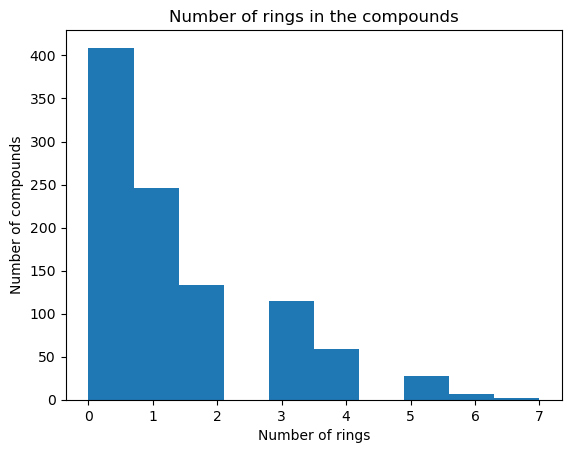

In [61]:
plt.hist(d['n_rings'])

plt.title('Number of rings in the compounds')
plt.xlabel('Number of rings')
plt.ylabel('Number of compounds')

Text(0, 0.5, 'Number of compounds')

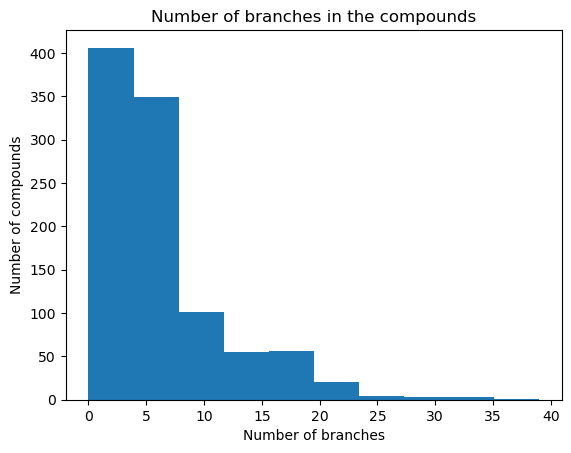

In [62]:
plt.hist(d['n_branches'])

plt.title('Number of branches in the compounds')
plt.xlabel('Number of branches')
plt.ylabel('Number of compounds')

how often different section names appear. will need to use a variant of this 

<BarContainer object of 23 artists>

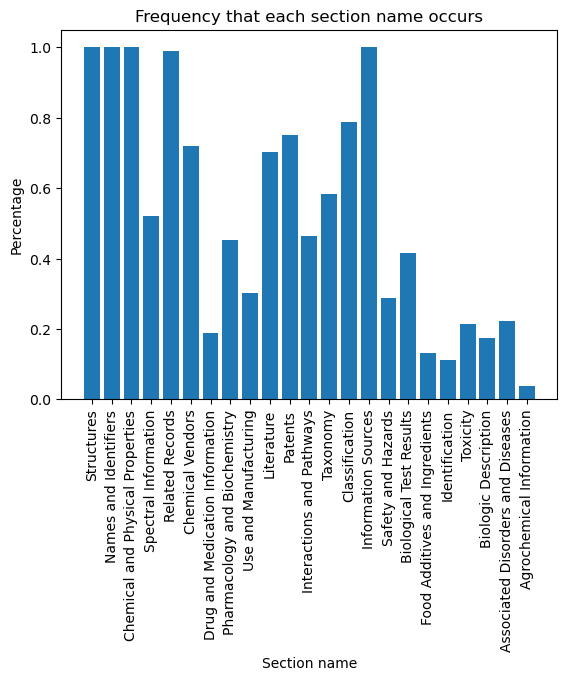

In [4]:
df_s_names = pd.read_csv('.\pub_chem_1000_sections.csv')
d_s_names = df_s_names.to_dict(orient='list')

num_times_section_title_appears = {}


#When scraping the section names from PubChem, for a given CID, I put them in a list, and then put that list in a list, that 
#ended up being a column of an excel file labelled "sections". But when I turn that excel file into a dictionary, each list of
#section names because a string that looked like '['1 Contents', '2 Names', '3 Spectral Information'...]' etc. This regular 
#expression is used to parse this string

isolate_names = r"([0-9]+)([a-zA-z\s]+)" #any number greater than 0 of [0-9] concatenated with any number of spaces and 
#[A-Z][a-z] greater than 0


for i in d_s_names['CID']:
    find_section_names = re.findall(isolate_names, d_s_names['sections'][i-1])

    for s_name in find_section_names:
        if s_name[1].strip() not in num_times_section_title_appears.keys():
            num_times_section_title_appears[s_name[1].strip()] = 1
            #strip removes whitespace from the beginning and the end of the string. 
            #the value at the zeroth index is what number section it is, the value at the first index is the section name
        
        else: num_times_section_title_appears[s_name[1].strip()] += 1
            
names = list(num_times_section_title_appears.keys())
perc_occurance_of_names = np.array(list(num_times_section_title_appears.values()))/len(d_s_names['CID'])

plt.title('Frequency that each section name occurs')
plt.xlabel('Section name')
plt.xticks(rotation=90) #explained how to rotate the axis labels: https://www.pythoncharts.com/matplotlib/rotating-axis-labels/
plt.ylabel('Percentage')
plt.bar(names, perc_occurance_of_names)

In [5]:
print(names)

['Structures', 'Names and Identifiers', 'Chemical and Physical Properties', 'Spectral Information', 'Related Records', 'Chemical Vendors', 'Drug and Medication Information', 'Pharmacology and Biochemistry', 'Use and Manufacturing', 'Literature', 'Patents', 'Interactions and Pathways', 'Taxonomy', 'Classification', 'Information Sources', 'Safety and Hazards', 'Biological Test Results', 'Food Additives and Ingredients', 'Identification', 'Toxicity', 'Biologic Description', 'Associated Disorders and Diseases', 'Agrochemical Information']


Visualizing BPs and MPs (made histograms, though maybe should have used a different type of plot instead? This is fine for now). Note that K means clusters are commonly used for NLP text analysis (could also validate the approach by combining "Use and Manufacturing" and "Biological Test Results" and other sections together, and then seeing if clustering can sort what is what). So consider using it in this case, instead of trying to use it to predict physical properties with features? or maybe nevermind, try both...

Text(0, 0.5, 'Number of compounds')

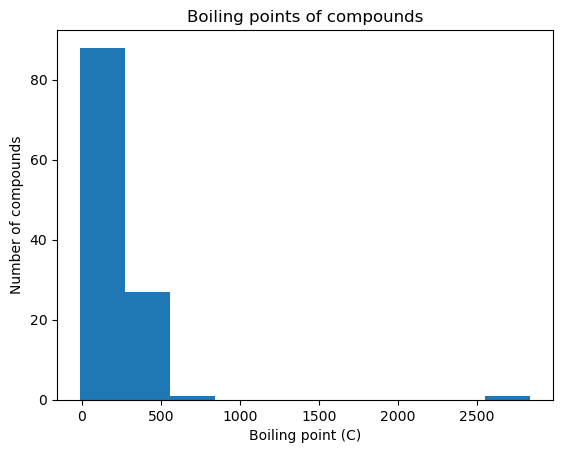

In [18]:
df_parsed_BPs_MPs = pd.read_csv('pub_chem_1000_compounds_BP_MP_parsed.csv')
d_parsed_BPs_MPs = df_parsed_BPs_MPs.to_dict(orient = 'list')

CIDS_w_BPs_and_units = []
CIDS_w_MPs_and_units = []

BPs_to_vis = []
MPs_to_vis = []

for i in d_parsed_BPs_MPs['CID']: #get the indices of the compounds whose BPs and MPs have units
    if(d_parsed_BPs_MPs['has_units_BP'][i-1] == 'y'):
        #The first CID is '1', whereas lists are indexed as 0, so the info about the compound cooresponding to a CID of 1, is
        #in the 0th index of each list
        CIDS_w_BPs_and_units.append(i)
    
    if(d_parsed_BPs_MPs['has_units_MP'][i-1] == 'y'):
        CIDS_w_MPs_and_units.append(i)    

for j in CIDS_w_BPs_and_units:
    BPs_to_vis.append(d_parsed_BPs_MPs['BP_parsed_C'][j-1])
    
for j in CIDS_w_MPs_and_units:
    MPs_to_vis.append(d_parsed_BPs_MPs['MP_parsed_C'][j-1])
    
BPs_to_vis = np.array(BPs_to_vis)
plt.hist(BPs_to_vis.astype('float'))

plt.title('Boiling points of compounds')
plt.xlabel('Boiling point (C)')
plt.ylabel('Number of compounds') 

Text(0, 0.5, 'Number of compounds')

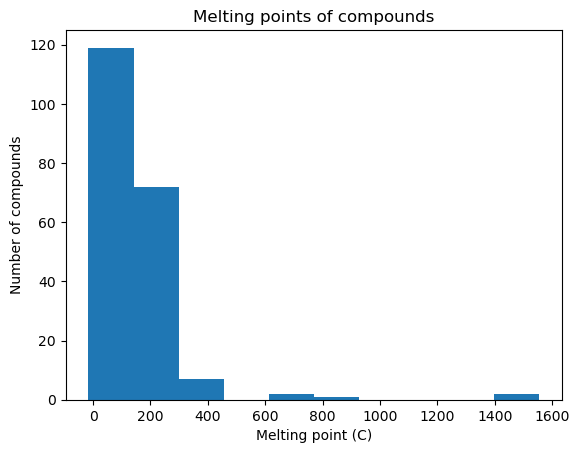

In [19]:
MPs_to_vis = np.array(MPs_to_vis)
plt.hist(MPs_to_vis.astype('float'))

plt.title('Melting points of compounds')
plt.xlabel('Melting point (C)')
plt.ylabel('Number of compounds') 

Text(0, 0.5, 'Number of compounds')

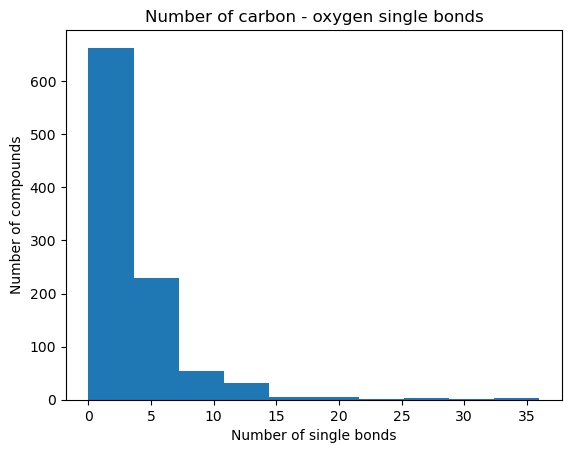

In [3]:
df_bonding = pd.read_csv('.\pub_chem_1000_compounds_nitr_and_oxygen_bonding.csv')
#apparently, performing operations on pandas dataframes is quicker than doing so on dictionaries with equivalent information
#and so for this reason, and also because they are probably more like working with SQL, I should figure out how to do these 
#things on pandas dataframes, instead of converting everything to dictonaries, at some point.
d_bonding = df_bonding.to_dict(orient='list') 

plt.hist(d_bonding['CO'])

plt.title('Number of carbon - oxygen single bonds')
plt.xlabel('Number of single bonds')
plt.ylabel('Number of compounds')

Text(0, 0.5, 'Number of compounds')

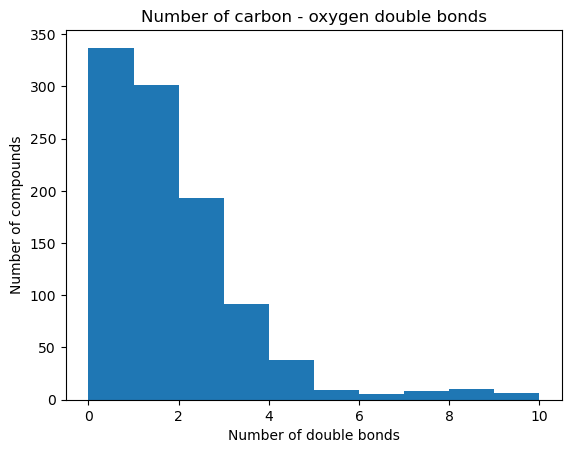

In [12]:
plt.hist(d_bonding['C=O'])

plt.title('Number of carbon - oxygen double bonds')
plt.xlabel('Number of double bonds')
plt.ylabel('Number of compounds')

Text(0, 0.5, 'Number of compounds')

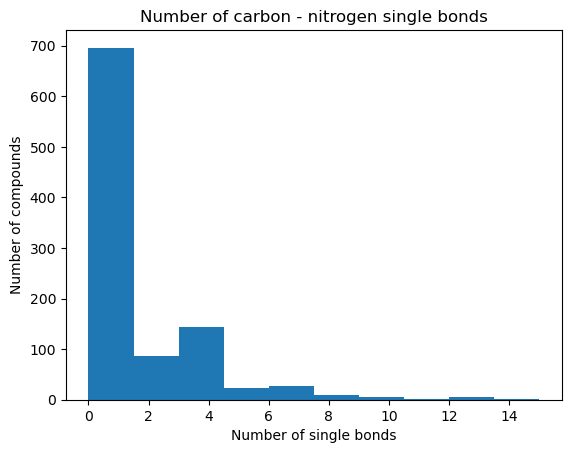

In [11]:
plt.hist(d_bonding['CN'])

plt.title('Number of carbon - nitrogen single bonds')
plt.xlabel('Number of single bonds')
plt.ylabel('Number of compounds')

Text(0, 0.5, 'Number of compounds')

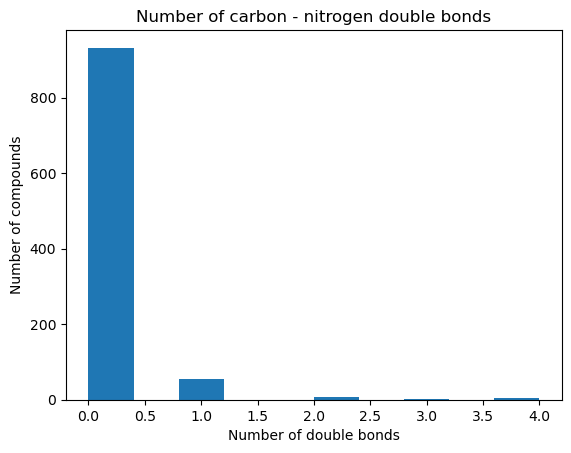

In [13]:
plt.hist(d_bonding['C=N'])

plt.title('Number of carbon - nitrogen double bonds')
plt.xlabel('Number of double bonds')
plt.ylabel('Number of compounds')

Text(0, 0.5, 'Number of compounds')

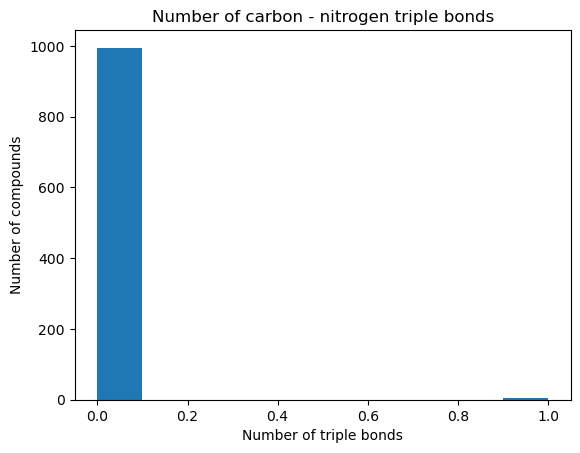

In [14]:
plt.hist(d_bonding['C#N'])

plt.title('Number of carbon - nitrogen triple bonds')
plt.xlabel('Number of triple bonds')
plt.ylabel('Number of compounds')

The below is a failed approach to look at bonding!

In [ ]:
#d = df.to_dict(orient='list')
compounds = df.to_dict(orient='list')

print(d.keys())
print('\n\n')

bonding = {'C-O':[0]*len(d['CID']), 'C=O':[0]*len(d['CID']), 'C-N':[0]*len(d['CID']), 'C=N':[0]*len(d['CID']),
           'C#N':[0]*len(d['CID'])  }


for i in d['CID']:
    smiles_repr = d['smiles_repr']
    
    for j in range(1, len(smiles_repr) -1):
            #loop through in sets of three characters, and, for example, if you have C=O or O=C, then count one double bond 
        
        chars = smiles_repr[j-1,j+2]
        
        if chars[1] == 'O':
            if chars[1] == '=' || chars[0] == '=':
                bonding['C=O'][i] += 1
            elif chars == 'COC':
                bonding['C-O'][i] += 2
            else
                bonding['C-O'][i] += 1
            
        if chars[1] == 'N':
            
            
        #need to catch if the O or N are on the ends too!
        
n_atoms_in_compound = []

for i in d['CID']:
#for i in range(1,10):
    n_atoms_in_compound.append(0)
    
    for j in num_times_element_appears.keys():
        
        #get number of compounds with each element (and then will convert to a percentage, afterwards)
        if int(d[j][i-1])  != 0:
            num_times_element_appears[j] += 1
            
            n_atoms_in_compound[i-1] += d[j][i-1]
            
print(num_times_element_appears)

First, going to look at the different ways that oxygen and nitrogen show up in the string patterns, so that, when I try to count the number of different bond types, I don't miss some wierd edge case.

In [ ]:
print(d.keys())
print('\n\n')

str_patterns = {'O':[] , 'N':[]}

for i in d['CID']:
    smiles_repr = d['smiles_repr']
    
    for j in range(1, len(smiles_repr) -1):
        
        chars = smiles_repr[j-1:j+2]
        print(chars)
        
        if chars[1] == 'O':
            if not (chars in str_patterns['O']):
                str_patterns['O'].append(chars)
        
        if chars[1] == 'N':
             if not (chars in str_patterns['N']):
                str_patterns['N'].append(chars)           

print(str_patterns['O'])
print(str_patterns['N'])